In [1]:
import pandas as pd
import keras
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TerminateOnNaN, CSVLogger
from tensorflow.keras.metrics import AUC
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.notebook_repr_html', True)

In [2]:
final_dx = pd.read_pickle('ZalevskiyDiplom/dataframes/fixed_final_df.pkl')
final_dx

,filename,disease,followup,patientID,age,gender,viewposition,width,height,x,path,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,Crossed Disease,array_disease
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,K:/DiplomZalevskiy/data/images/00000001_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,K:/DiplomZalevskiy/data/images/00000001_002.png,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]"
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,K:/DiplomZalevskiy/data/images/00000002_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,K:/DiplomZalevskiy/data/images/00000003_001.png,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
5,00000003_002.png,Hernia,1,3,75,F,PA,2048,2500,0.168,K:/DiplomZalevskiy/data/images/00000003_002.png,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112114,00030801_000.png,No Finding,0,30801,38,M,PA,2500,2048,0.168,K:/DiplomZalevskiy/data/images/00030801_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,K:/DiplomZalevskiy/data/images/00030802_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,K:/DiplomZalevskiy/data/images/00030803_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,K:/DiplomZalevskiy/data/images/00030804_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [27]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
model_log = pd.read_csv('cnn_best_logger.cvs')
model_log

,epoch,auc_1,categorical_accuracy,loss,lr,val_auc_1,val_categorical_accuracy,val_loss
0,0,0.738596,0.175294,0.177852,0.001,0.758059,0.139008,0.170068
1,1,0.772595,0.152150,0.166440,0.001,0.789755,0.179077,0.163565
2,2,0.780353,0.165027,0.164594,0.001,0.793554,0.149475,0.162266
3,3,0.784444,0.168828,0.163585,0.001,0.798373,0.183197,0.161165
4,4,0.788179,0.174363,0.162748,0.001,0.801485,0.249298,0.159672
5,5,0.792446,0.182077,0.161921,0.001,0.806182,0.168457,0.158771
6,6,0.795189,0.182599,0.161261,0.001,0.807441,0.220032,0.158520
7,7,0.797317,0.183773,0.160877,0.001,0.811967,0.218445,0.157476
8,8,0.799307,0.186941,0.160413,0.001,0.813575,0.192627,0.157289
9,9,0.802182,0.193668,0.159707,0.001,0.817046,0.223145,0.156431


In [83]:
def plot_history_log(log):
    """
    Takes the model_log file as an input.
    model_log has to be in a pandas DataFrame object e.g. model_log = pd.read_csv('cnnmodels/baseline_training.csv')
    Returns a plotly plot with training and validation accuracies and losses.
    """
    epoch = log.epoch
    fig = make_subplots(
        rows=1, cols=3,
        subplot_titles=("Потери на обучающей и валидационной выборке",
                        "Категориальная точность на обучающей и валидационной выборке",
                        "Параметр AUC на обучеющей и валидационной выборке"))
    #training and valid loss
    fig.add_trace(go.Scatter(x=epoch, y=log.loss,
                             name='Потери при обучении',
                             marker_color='red'),
                  row=1, col=1)
    fig.add_trace(go.Scatter(x=epoch, y=log.val_loss,
                             name='Потери на валидации',marker_color='steelblue'),
                  row=1, col=1)
    #training and valid categorical acc
    fig.add_trace(go.Scatter(x=epoch, y=log.categorical_accuracy,
                            name='Категориальная точность на обучении',
                             marker_color='steelblue'),
                  row=1, col=2)
    fig.add_trace(go.Scatter(x=epoch, y=log.val_categorical_accuracy,
                             name='Категориальная точность на валидации',
                             marker_color='steelblue'),
                  row=1, col=2)
    #training and valid auc
    fig.add_trace(go.Scatter(x=epoch, y=log.auc_1,
                            name='AUC при обучении',
                             marker_color='purple'),
                  row=1, col=3)
    fig.add_trace(go.Scatter(x=epoch, y=log.val_auc_1,
                             name='AUC на валидации',
                             marker_color='purple'),
                  row=1, col=3)
    fig.update_yaxes(title_text="Потери", row=1, col=1)
    fig.update_yaxes(title_text="Точность", row=1, col=2)
    fig.update_yaxes(title_text="AUC", row=1, col=3)
    for col in [1, 2, 3]:
        fig.update_xaxes(title_text="Epoch", row=1, col=col)
    fig.update_layout(template='plotly_white', height=500, width=1450)
    fig.update_layout(template='plotly_white', height=500, width=600,
                  legend=dict(x=.5, xanchor="center"),title_text="")
    fig.show()

In [84]:
plot_history_log(model_log)
#fig = go.Figure()
#fig.add_trace(go.Scatter(x=epoch,y = model_log.loss,name='Потери на обучении',marker_color='red'))
#fig.add_trace(go.Scatter(x=epoch,y= model_log.val_loss,name='Потери на валидации',marker_color='steelblue'))

#fig.add_trace(go.Scatter(x=epoch, y=  model_log.categorical_accuracy, name='Категориальная точность',marker_color='red'))
#fig.add_trace(go.Scatter(x=epoch, y=  model_log.val_categorical_accuracy, name='Категориальная точность на валидации',marker_color='lightskyblue'))

# fig.add_trace(go.Scatter(x=epoch, y=model_log.auc_1,name='AUC на обучении',marker_color='red'))
# fig.add_trace(go.Scatter(x=epoch, y=model_log.val_auc_1,name='AUC на валидации',marker_color='steelblue'))

# fig.update_layout(margin=dict(l=0, r=0, t=0, b=0),template='plotly_white', height=500, width=475,
#                   legend=dict(x=.5, xanchor="center"),title_text="Model History")
                    
# fig.update_yaxes(title_text="Потери")
# fig.update_xaxes(title_text="Эпоха")
# fig.show()

In [3]:
train_set = pd.read_pickle('ZalevskiyDiplom/sample/new_train_set.pkl')
valid_set = pd.read_pickle('ZalevskiyDiplom/sample/new_valid_set.pkl')
train_set.shape

(78895, 27)

In [4]:
# ImageGenerator и создание генераторов для обучения

path_to_images = 'K:/DiplomZalevskiy/data/images'
disease_labels = ['Atelectasis',
       'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema',
       'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening',
       'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']

image_generator = ImageDataGenerator(rescale=1./255.,
                         samplewise_center=True,
                         samplewise_std_normalization=True,
                         horizontal_flip=False,
                         vertical_flip=False,
                         height_shift_range=0.1,
                         width_shift_range=0.1,
                         rotation_range=5,
                         shear_range=0.1,
                         fill_mode='reflect',
                         zoom_range=0.15)


ValueError: num must be 1 <= num <= 4, not 5

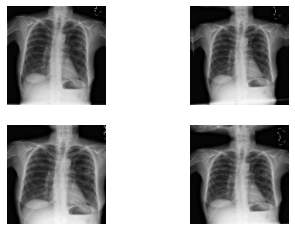

In [7]:
# Импорты
from keras.preprocessing import image
from tensorflow.keras.utils import load_img,img_to_array,array_to_img
import glob
import cv2


# # Аугментация данных
# img = load_img(r'K:\DiplomZalevskiy\data\aug_data\orig_data.png')
# x = img_to_array(img)
# x = x.reshape((1,) + x.shape)
# i = 0
# for batch in image_generator.flow(x,batch_size=1,save_to_dir = r'K:\DiplomZalevskiy\data\aug_data'):
#     i+=1 
#     if i > 5:
#         break

# Выводе аугментированных изображений
import matplotlib.pyplot as plt
path = 'K:/DiplomZalevskiy/data/aug_data/*'
i= 0
files = glob.glob(path)
for l in files:
    im = cv2.imread(l)
    im = cv2.resize(im,(128,128))
    plt.subplot(2,2,i+1)
    plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB)); plt.axis('off')
    i+=1

In [ ]:
# Генераторы данных для обучения и валидации
train_generator = image_generator.flow_from_dataframe(
    dataframe=train_set,
    directory=path_to_images,
    x_col="filename",
    y_col= disease_labels,
    classes = disease_labels,
    target_size=(128, 128),
    seed=42,
    class_mode='raw',
    batch_size=32,
    shuffle=False)

valid_generator = image_generator.flow_from_dataframe(
    dataframe=valid_set,
    directory=path_to_images,
    x_col="filename", #строка, столбец в дата-кадре, содержащий имена файлов (или абсолютные пути, если каталог None).
    y_col= disease_labels,
    classes = disease_labels,
    target_size=(128, 128),
    seed=42,
    class_mode='raw', # если class_mode является «raw» или «multi_output», он должен содержать колонки, указанные в y_col.
    batch_size=256,
    shuffle=False)

x_train, y_train = next(train_generator) # возвращает следующий аргумент из генератора

In [71]:
# Коллбеки
model_checkpoint = ModelCheckpoint(
    filepath = 'cnn_best_{epoch:02d}_{val_loss:.2f}.hdf5',
    verbose = 1,
    monitor = 'val_loss',
    save_best_only= True)

reduce_lron = ReduceLROnPlateau(monitor='val_loss', 
                                factor=0.1, 
                                patience=3,
                                verbose=1, mode="min", 
                                min_lr=1e-5)

auc = AUC()
#model_checkpoint = ModelCheckpoint(..) # Описан ранее
#reduce_lron = ReduceLROnPlateau(...) # Описан ранее
ter_by_nan = TerminateOnNaN() 
logger = CSVLogger('cnn_best_logger.cvs')
callbacks_lst = [model_checkpoint,reduce_lron,ter_by_nan,logger]

In [72]:
from keras.metrics import top_k_categorical_accuracy
def top_5_categorical_accuray(y_true,y_pred):
    return top_k_categorical_accuracy(y_true,y_pred,k=5)

In [ ]:
# Создание модели Sequential()
from tensorflow.keras.layers import (Conv2D, GlobalMaxPool2D, GlobalAveragePooling2D,
                                     Dropout, Flatten, Dense, Activation, Dropout,
                                     BatchNormalization, MaxPooling2D)

from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import (ModelCheckpoint, LearningRateScheduler, 
                                        EarlyStopping, CSVLogger, TerminateOnNaN,
                                       ReduceLROnPlateau)


cnn_best = Sequential()
cnn_best.add(Conv2D(filters=8, kernel_size=3, padding='same',
                          activation='relu', input_shape=(128, 128,3)))
cnn_best.add(BatchNormalization())
cnn_best.add(MaxPooling2D(pool_size=2))
cnn_best.add(Dropout(0.4))
cnn_best.add(Conv2D(filters=16, kernel_size=3,
                          padding='same', activation='relu'))
cnn_best.add(BatchNormalization())
cnn_best.add(MaxPooling2D(pool_size=2))
cnn_best.add(Dropout(0.4))
cnn_best.add(Conv2D(filters=32, kernel_size=3,
                          padding='same', activation='relu'))
cnn_best.add(BatchNormalization())
cnn_best.add(MaxPooling2D(pool_size=2))
cnn_best.add(Dropout(0.4))
cnn_best.add(Conv2D(filters=64, kernel_size=3,
                          padding='same', activation='relu'))
cnn_best.add(BatchNormalization())
cnn_best.add(MaxPooling2D(pool_size=2))
cnn_best.add(Dropout(0.4))
cnn_best.add(Conv2D(filters=128, kernel_size=3,
                          padding='same', activation='relu'))
cnn_best.add(BatchNormalization())
cnn_best.add(MaxPooling2D(pool_size=3))
cnn_best.add(Dropout(0.4))
cnn_best.add(Flatten())
cnn_best.add(Dense(256, activation='relu'))
cnn_best.add(Dropout(0.4))
cnn_best.add(Dense(512, activation='relu'))
cnn_best.add(Dropout(0.4))
cnn_best.add(Dense(14, activation='sigmoid'))

cnn_best.compile(optimizer='adam', loss='binary_crossentropy', metrics=['categorical_accuracy',auc])

cnn_best.summary()
#.compile(optimizer='adam', 
# loss='categorical_crossentropy',
# metrics=['accuracy'])

In [ ]:
# Начало обучение модели
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
cnn_best.fit_generator(generator = train_generator, epochs = 20,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=valid_generator,
    validation_steps=STEP_SIZE_VALID,
    callbacks = callbacks_lst,
    shuffle = False)                       

In [75]:
import os
if not os.path.exists('models'):
        os.makedirs('models')

number_obvervation = len(os.listdir('models'))  
print(number_obvervation)
cnn_best.save(f'models/my_cnn_best_{number_obvervation}.h5')
    

1


In [77]:
result_train_acurracy = cnn_best.evaluate_generator(train_generator,steps =100)


C:\Users\Yaroslavel\AppData\Local\Temp\ipykernel_23204\685583834.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result_train_acurracy = cnn_best.evaluate_generator(train_generator,steps =100)


In [ ]:
result_train_acurracy

In [ ]:
valid_train_acurracy = cnn_best.evaluate_generator(valid_generator,steps=100)

In [95]:
valid_train_acurracy

[0.1534174531698227, 0.18910156190395355, 0.8291822075843811]

In [ ]:
pred_y = cnn_best.predict_generator(valid_generator,
                                          steps=valid_generator.n/valid_generator.batch_size,
                                          verbose = 1)

In [104]:
valid_generator.labels[:,idx]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

5446
2313
8886
2729
1160
1406
950
5476
813
1786
1383
3397
2903
290


Text(0, 0.5, 'True Positive Rate')

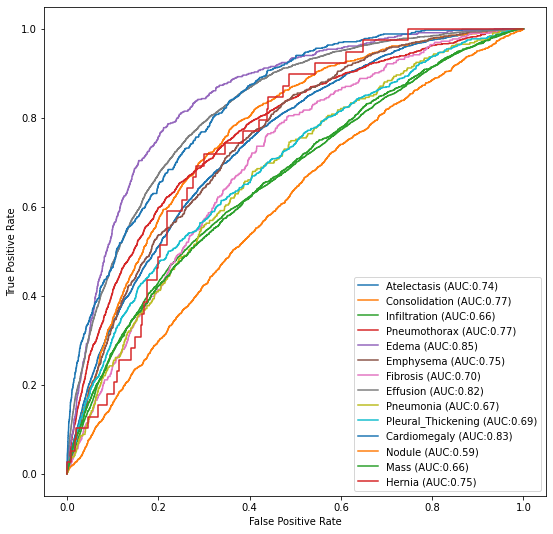

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(valid_generator.labels[:,idx].astype(int), pred_y[:,idx])
    print(len(fpr))
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')

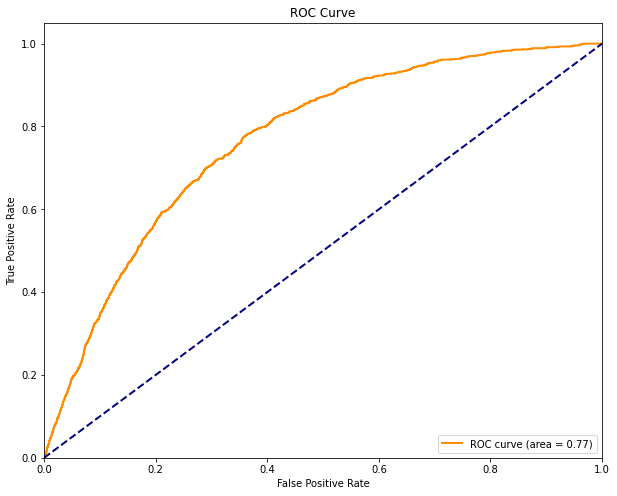

In [111]:
from sklearn.metrics import roc_curve,auc
fpr      = dict()
tpr      = dict()
roc_auc  = dict()

for i in range(14):
       fpr[i], tpr[i], _ = roc_curve(valid_generator.labels[:,i], pred_y[:, i])
       roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(valid_generator.labels.ravel(), pred_y.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure(figsize = (10,8))
lw = 2
plt.plot(fpr[1],tpr[1],color = 'darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' %roc_auc[1])
plt.plot([0,1],[0,1],color = 'navy',lw = lw, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
final_dx[final_dx['filename']=='00008362_011.png']
final_dx[final_dx['patientID']== 8362]
effusion_df = final_dx[final_dx['Effusion']==1].loc[0:1000] # 0 - начальный индекс, 
                                                            #1000 - конечный индекс
effusion_df

In [ ]:
# предсказывание результатов

disease_labels = ['Atelectasis',
       'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema',
       'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening',
       'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']




disease_classes = {i:c for i,c in enumerate(disease_labels)}
from tensorflow.keras.utils import load_img,img_to_array
image = load_img(r'K:DiplomZalevskiy/data/00008362_011.png',target_size=(128,128))
img_tensor = img_to_array(image)
img_tensor /= 255
img_tensor = np.expand_dims(img_tensor,axis=0)
result_label = np.argmax(test_model.predict(img_tensor)[0],axis=0)
print('true label',disease_classes[np.argmax(y_test)])
print('predicted label',disease_classes[result_label])
#sorted(result_label)